In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


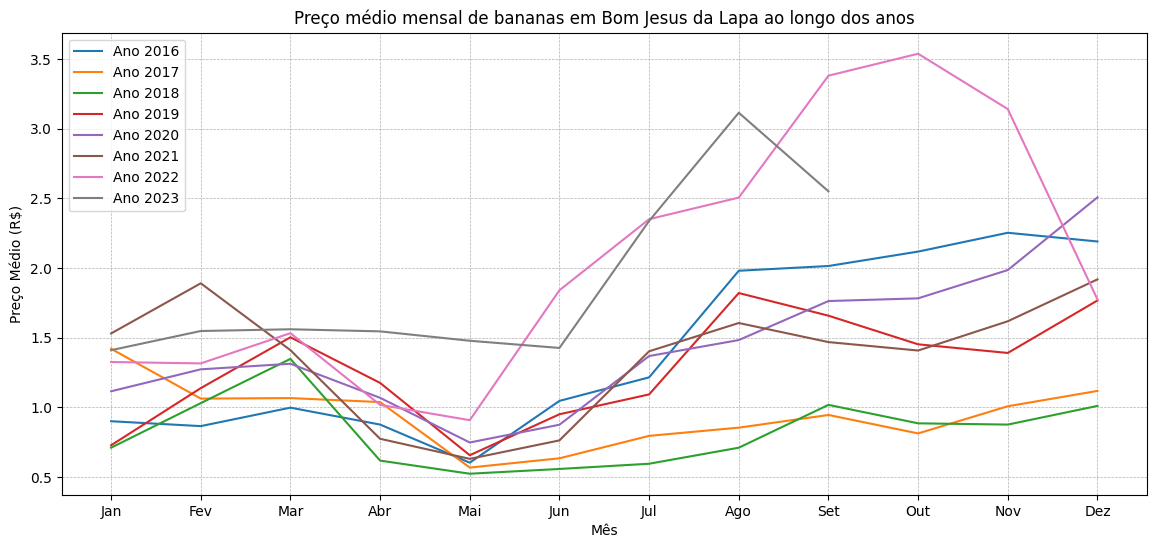

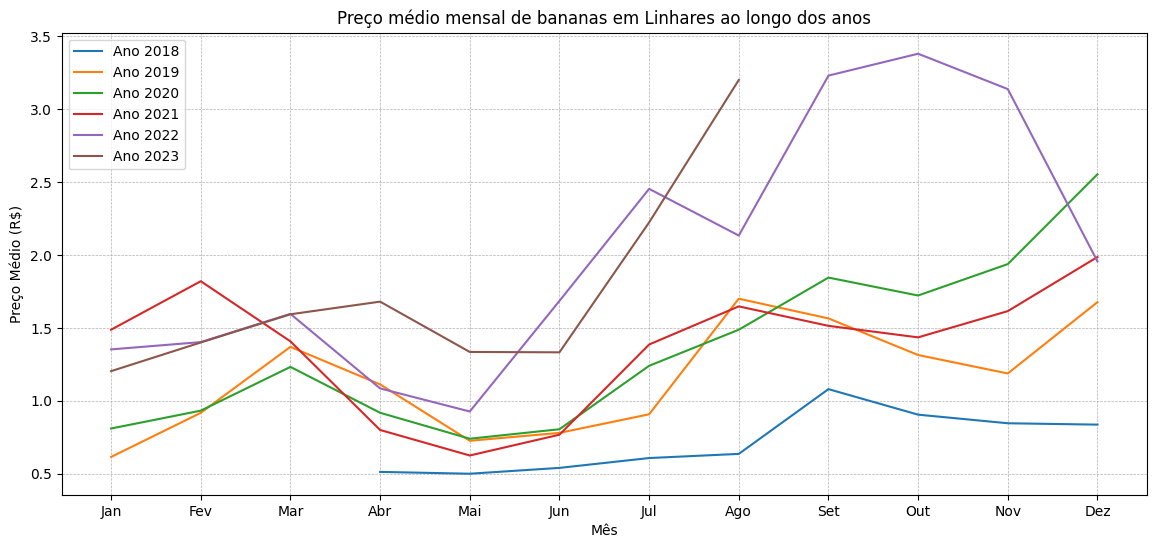

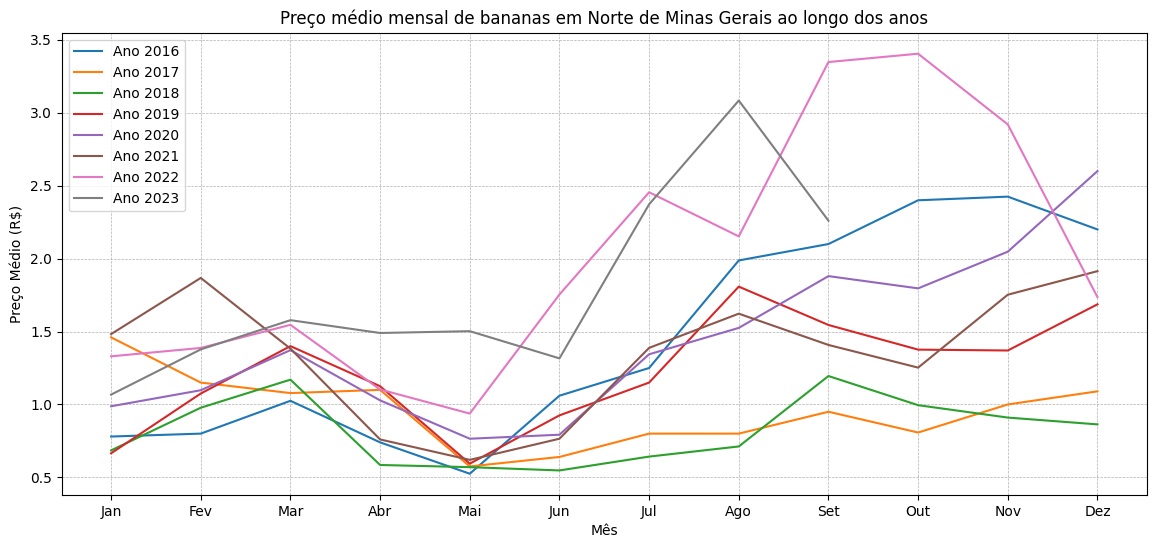

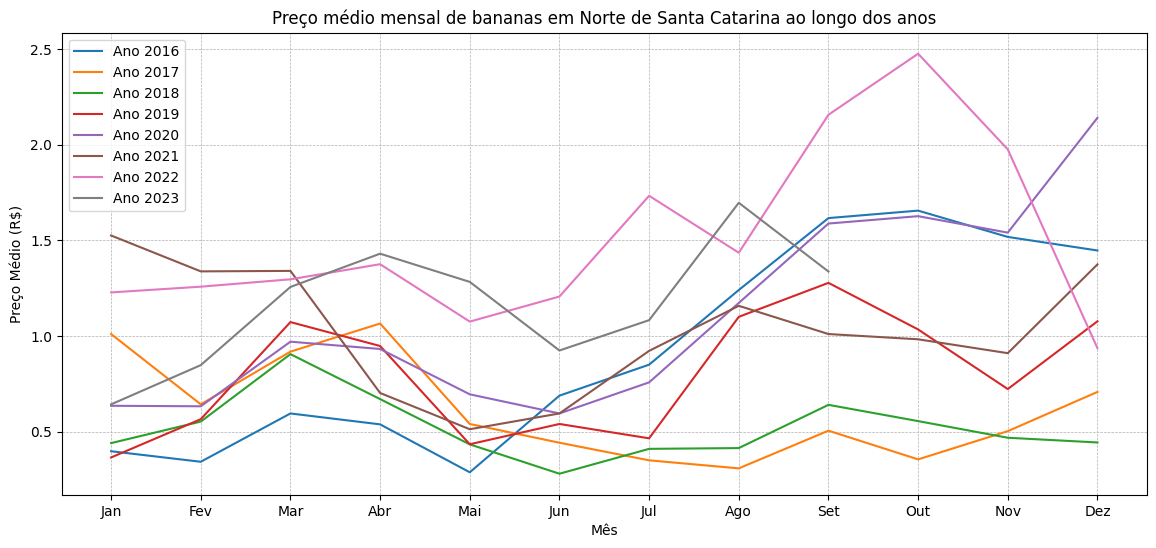

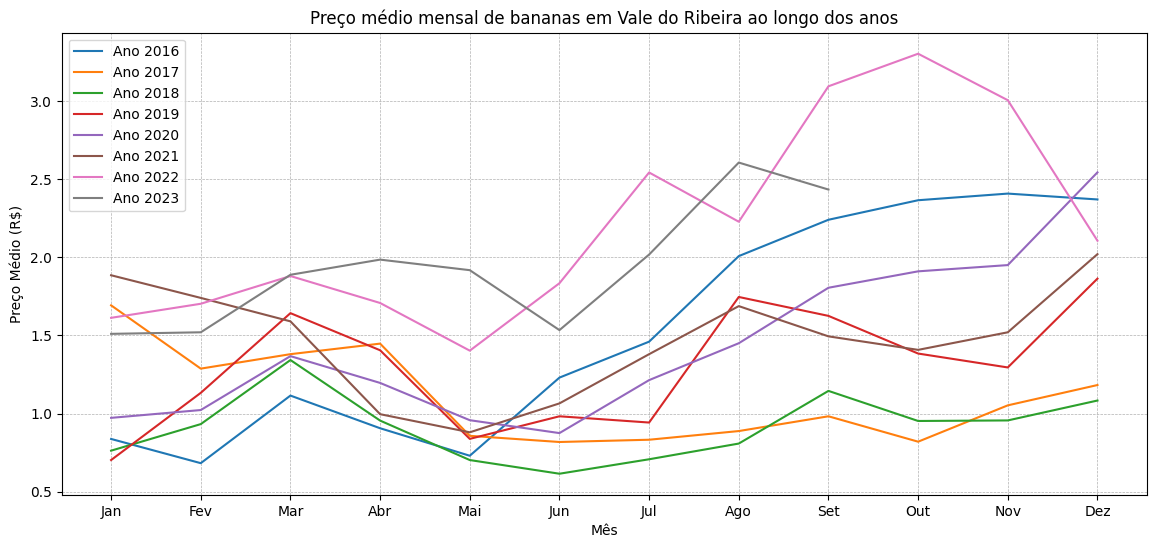

In [4]:
# Importar bibliotecas necessárias
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Carregar os dados
data = pd.read_excel("/content/drive/MyDrive/20230926111334-precos-medios.xlsx")

# Agrupar os dados por Região, Ano e Mês e calcular o preço médio
grouped_data = data.groupby(['Região', 'Ano', 'Mês']).agg({'Preço': 'mean'}).reset_index()

# Realizar a regressão múltipla para cada região
regression_results = {}
for region in grouped_data['Região'].unique():
    region_data = grouped_data[grouped_data['Região'] == region]
    X = region_data[['Ano', 'Mês']]
    y = region_data['Preço']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    regression_results[region] = model

# Extrair coeficientes para cada região
coefficients = {}
for region, model in regression_results.items():
    coefficients[region] = {
        'Ano': model.params['Ano'],
        'Mês': model.params['Mês']
    }

# Função para plotar os preços médios por região
def plot_region_prices(region_data, region_name):
    plt.figure(figsize=(14, 6))
    for year in region_data['Ano'].unique():
        yearly_data = region_data[region_data['Ano'] == year]
        plt.plot(yearly_data['Mês'], yearly_data['Preço'], label=f"Ano {year}")
    plt.title(f"Preço médio mensal de bananas em {region_name} ao longo dos anos")
    plt.xlabel("Mês")
    plt.ylabel("Preço Médio (R$)")
    plt.xticks(list(range(1, 13)), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
    plt.legend()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

# Plotar gráficos para cada região
for region in grouped_data['Região'].unique():
    plot_region_prices(grouped_data[grouped_data['Região'] == region], region)


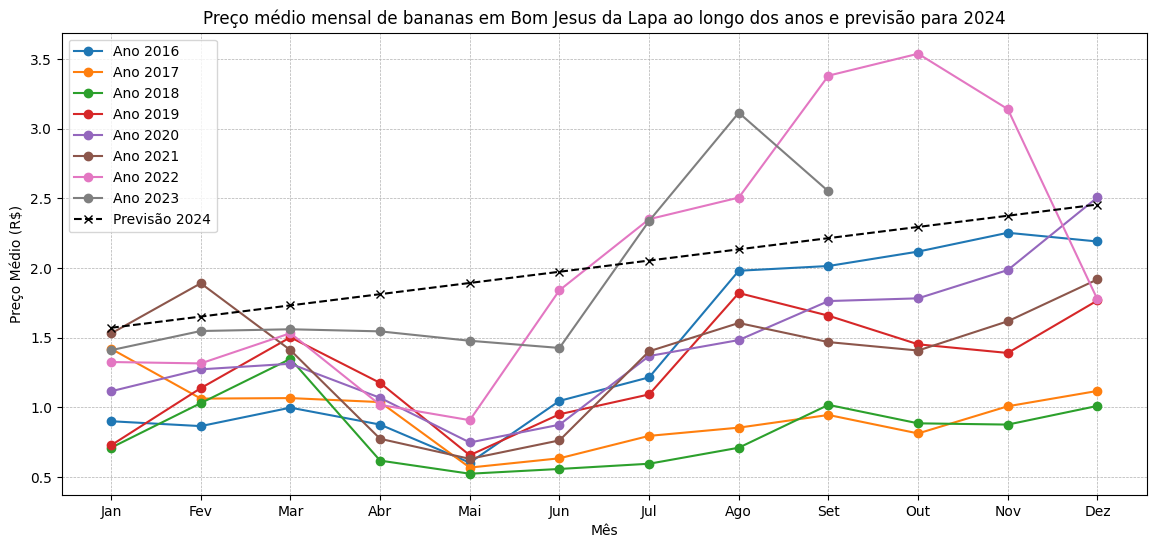

In [9]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Carregue os dados (ajuste o caminho conforme necessário)
data = pd.read_excel("/content/drive/MyDrive/20230926111334-precos-medios.xlsx")

# Agrupe os dados por Região, Ano e Mês e calcule o preço médio
grouped_data = data.groupby(['Região', 'Ano', 'Mês']).agg({'Preço': 'mean'}).reset_index()

# Filtrar os dados para a região "Bom Jesus da Lapa"
region_data = grouped_data[grouped_data['Região'] == 'Bom Jesus da Lapa']

# Treinar um modelo de regressão para essa região
X = region_data[['Ano', 'Mês']]
y = region_data['Preço']
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

# Previsões para o próximo ano
prediction_data = pd.DataFrame({
    'const': [1] * 12,  # Adicione explicitamente a coluna const
    'Ano': [next_year] * 12,
    'Mês': list(range(1, 13))
})
predictions = model.predict(prediction_data)
prediction_data['Previsão'] = predictions

# Plotar o gráfico
plt.figure(figsize=(14, 6))

# Preços reais
for year in region_data['Ano'].unique():
    yearly_data = region_data[region_data['Ano'] == year]
    plt.plot(yearly_data['Mês'], yearly_data['Preço'], label=f"Ano {year}", marker='o')

# Previsões
plt.plot(prediction_data['Mês'], prediction_data['Previsão'], label=f"Previsão {next_year}", linestyle='--', color='black', marker='x')

plt.title(f"Preço médio mensal de bananas em Bom Jesus da Lapa ao longo dos anos e previsão para {next_year}")
plt.xlabel("Mês")
plt.ylabel("Preço Médio (R$)")
plt.xticks(list(range(1, 13)), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [11]:
# Calcular o preço médio para cada mês em "Bom Jesus da Lapa"
bom_jesus_prices = grouped_data[grouped_data['Região'] == 'Bom Jesus da Lapa']
monthly_avg_price = bom_jesus_prices.groupby('Mês').agg({'Preço': 'mean'}).reset_index()

# Identificar os meses com os preços médios mais altos
top_months_bom_jesus = monthly_avg_price.nlargest(3, 'Preço')['Mês'].tolist()
print(top_months_bom_jesus)


[9, 8, 12]


In [12]:
# Considerando um ciclo de crescimento de 9 a 12 meses, calcular os meses ideais para plantio
planting_months = [(month - 9) % 12 + 1 for month in top_months_bom_jesus]
print(planting_months)


[1, 12, 4]
